
# GAN 

Generative Adverserial Networks

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data

In [51]:
from tensorflow.keras.datasets import mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

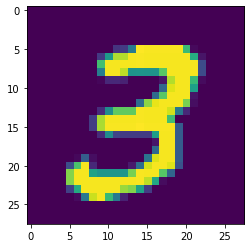

In [52]:
plt.imshow(X_train[7])

In [53]:
y_train[7]

3

### Data Filtering 

for Faster Training

In [54]:
only_zeros = X_train[y_train == 0]     #Filtering out zeros only

In [55]:
only_zeros.shape

(5923, 28, 28)

In [56]:
X_train.shape

(60000, 28, 28)

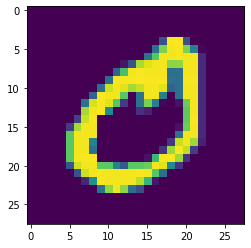

In [57]:
plt.imshow(only_zeros[1]);

## Build GAN

### Discriminator

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape

In [59]:
X_train[0].shape

(28, 28)

In [60]:
discriminator = Sequential()

discriminator.add(Flatten(input_shape=[28,28]))         # flatten images from 2D to 1D

discriminator.add(Dense(150, activation='relu')) # can add any number of neruons (problem specific)
discriminator.add(Dense(100, activation='relu'))  # can add more layers 

# Final Output Layer
discriminator.add(Dense(1, activation='sigmoid')) 

discriminator.compile(optimizer='adam', loss='binary_crossentropy')

### Generator

In [61]:
np.random.seed(42)
tf.random.set_seed(42)

In [62]:
# 100 -- 150 -- > 784

generator = Sequential()

generator.add(Dense(100, activation='relu', input_shape=[100])) 
generator.add(Dense(150, activation='relu'))
generator.add(Dense(784, activation='relu'))

generator.add(Reshape([28,28]))  #reshaping (28* 28)

# we don't need to compile Generator
# it is trained through full GAN model.

### Generator + Discriminator as GAN


In [63]:
GAN = Sequential([generator, discriminator])

In [64]:
discriminator.trainable = False

In [65]:
GAN.compile(optimizer='adam', loss='binary_crossentropy')  #  Discriminator shouldn't be trained in GAN compiling phase.

In [66]:
GAN.layers

In [67]:
GAN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 28, 28)            143634    
                                                                 
 sequential_3 (Sequential)   (None, 1)                 132951    
                                                                 
Total params: 276,585
Trainable params: 143,634
Non-trainable params: 132,951
_________________________________________________________________


In [68]:
GAN.layers[0].summary() # Generator Summary

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 150)               15150     
                                                                 
 dense_11 (Dense)            (None, 784)               118384    
                                                                 
 reshape_1 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [69]:
GAN.layers[1].summary() # Discriminator Summary

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 150)               117750    
                                                                 
 dense_7 (Dense)             (None, 100)               15100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 132,951
Trainable params: 0
Non-trainable params: 132,951
_________________________________________________________________


### Training


In [70]:
import tensorflow as tf

In [71]:
batch_size = 32

In [72]:
# my_data = X_train, we can change to what ever data we want to process
my_data = only_zeros

### Shuffle the data

In [73]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000) # shuffle in memory 1K each time

In [74]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

### Actual Setting up Batches

In [75]:
len(my_data)/batch_size

185.09375

In [76]:
dataset = dataset.batch(batch_size=32, drop_remainder=True).prefetch(1)   # Setting up Batches

-------

#### Training GAN Loop

In [77]:
[0.0] * 10

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [78]:
[[0.0]]*batch_size + [[1.0]]*batch_size

[[0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0]]

In [83]:
epochs = 1

In [84]:
# Grab the seprate components
generator, discriminator = GAN.layers


In [85]:
generator, discriminator

(<keras.engine.sequential.Sequential at 0x7fa7f2be44d0>,
 <keras.engine.sequential.Sequential at 0x7fa7f2c4f050>)

In [86]:
# For every batch in the dataset
for X_batch in dataset:
        
    #DISCRIMINATOR TRAINING PHASE 
    
    
    
    noise = tf.random.normal(shape=[batch_size, 100])       # Create Noise
    
    
    gen_images = generator(noise)    # Generate Image (noise input)
    
    # Concatenate Generated Images and actual images
    X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch, tf.float32)], axis=0)  # type cast to float32 for actual images
    
    # Targets Labels - 0s for fake images and 1s for real images 
    y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)    # (concat 32 labels(batch size)

    # train Discriminator
    discriminator.trainable = True
    
    # Train the discriminator on this current batch
    discriminator.train_on_batch(X_fake_vs_real, y1) # pass features and labels
    
    
    # GENERATOR TRAINING PHASE
    
    
    noise = tf.random.normal(shape=[batch_size, 100])     # Creating noise
    
    # making labels of real images for fake images 

    y2 = tf.constant([[1.0]] * batch_size)
    
    
    discriminator.trainable = False        # Discriminator not training
    
    # Training on GAN model
    GAN.train_on_batch(noise, y2)
        
print("TRAINING COMPLETE")         

TRAINING COMPLETE


## Generating Images

Generator will only learn to create one type of noisey zero, regardless of noise

In [87]:
noise = tf.random.normal(shape=[10, 100]) # 10 noisy things

In [88]:
noise.shape

TensorShape([10, 100])

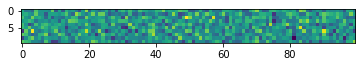

In [90]:
plt.imshow(noise); # 100 noise points

In [91]:
# we just pass in those noises to generate images
images = generator(noise)

In [92]:
images.shape # now we get 10 images with 28x28

TensorShape([10, 28, 28])

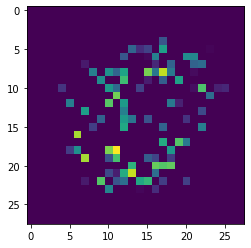

In [93]:
plt.imshow(images[0]);

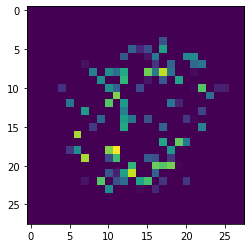

In [94]:
plt.imshow(images[7]);

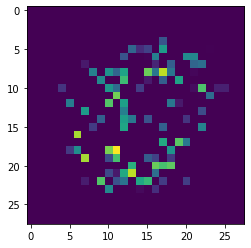

In [95]:
plt.imshow(images[5]);